# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. 

### Goals of the Case Study

There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
ls = pd.read_csv('leads.csv')
ls.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Exploring and Cleaning

In [3]:
ls.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
ls.shape

(9240, 37)

In [6]:
# Lets check the missing values in the data
ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

There are 17 columns that has missing values and out of these 17 columns, 5 columns has more than 4000 missing values and 1 has more than 3000 missing values. As the total number of data values is more than 9000, it will be difficult to manage and assign a data to missing values, so it will be better to drop these columns.  

In [7]:
100*ls.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
ls.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# Dropping the columns which has missing value more than 3000.
for i in ls.columns:
    if ls[i].isnull().sum()>3000:
        ls.drop(i, axis = 1, inplace=True)

In [10]:
ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

### Observation:

- There are now 4 categories, Lead Source, TotalVisits, Page Views Per Visit and Last Activity, which have missing values between 30-140, which can an important data and cannot just miss out such data in dropping them as these data may give the sales team an idea that how much time does the user spend time in exploring the options and how many times have they visited the website and what all products are they interested in. So we'll just fill in the missing value with mode value of the data. 

- We'll also fill in the 'Specialization' column with the mode value where ever there is a missing value as with the help of Specialization column we'll get an idea for what exactly users are looking in their career aspect. Also we will combine the management related Specialization under one named as Management_Specialization column.

In [11]:
ls['Lead Source'].fillna(ls['Lead Source'].mode()[0], inplace=True)
ls['TotalVisits'].fillna(ls['TotalVisits'].mode()[0], inplace=True)
ls['Page Views Per Visit'].fillna(ls['Page Views Per Visit'].mode()[0], inplace=True)
ls['Last Activity'].fillna(ls['Last Activity'].mode()[0], inplace=True)

In [12]:
ls['Specialization'] = ls['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

In [13]:
ls['Specialization'] = ls['Specialization'].replace(np.nan, 'Not Specified')

In [14]:
ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2461
Specialization                                      0
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [15]:
ls['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [16]:
ls['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

### Observation:

- Looking at the Country column, we understood that 95% of the values in the data is coming from India and remaining is from different country. So keeping this column in our data will not help as the data is highly skewed and will not help in model building.


- Along with that City column shows that 41% data is collected from that region and remaining from other Indian reagions and 28% is not selected as well. So we'll combine the Mumbai and Thane & Outskirts together and will consider as 1 and anything outside from this region we'll consider as 0.

In [17]:
ls.drop(['Country'], axis=1, inplace=True)

In [18]:
def region(x):
    category = ""
    if x == "Mumbai":
        category = 1
    elif x == "Thane & Outskirts":
        category = 1
    else:
        category = 0
    return category

ls['City'] = ls.apply(lambda x:region(x['City']), axis = 1)

In [19]:
ls['City'].value_counts(normalize=True)*100

0    56.991342
1    43.008658
Name: City, dtype: float64

In [20]:
ls.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                      0
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [21]:
ls['How did you hear about X Education'].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [22]:
ls['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
ls['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

### Observation: 

- Now there are some other columns which have not much relevance to the targetted variable converted and could be a possibility of duplication like the column named 'How did you hear about X Education' can be answered on the search engines, magzines, newspaper article, etc. So that column can also be dropped. 

- 'What matters most to you in choosing a course' column can be ignored for now as there are only 3 categories and Better Career Prospects is highly skewed. So if 99.95% of the people has the same need so, no need to consider it in the model building.

- 'What is your current occupation' column cannot be ignored as the data is skewed to Unemployed people and these set of people are looking for career transition or Upgrading the skills and may look for the career opportunity.

In [24]:
ls.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)
ls.drop(['How did you hear about X Education'], axis=1, inplace=True)

In [25]:
ls['What is your current occupation'].fillna(ls['What is your current occupation'].mode()[0], inplace=True)

In [26]:
ls.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
Specialization                                 0
What is your current occupation                0
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

In [27]:
ls['Lead Profile'].value_counts(normalize=True)*100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

In [28]:
ls['Lead Profile'].mode()

0    Select
Name: Lead Profile, dtype: object

### Observation:

- Lead profile also denotes that the lead level assigned based on their profile and looking at their value counts we found that there are the possibilities of potential lead along with other lead and Student of SomeSchool. What we can do is, those who comes under a potential lead profile, we'll consider them as 1 and those comes under select, as in not selected anything, can be considered as 0.

In [29]:
ls['Lead Profile'] = ls['Lead Profile'].apply(lambda x: 0 if x == 'Select' else 1)

In [30]:
ls['Lead Profile'].value_counts(normalize=True)*100

1    55.12987
0    44.87013
Name: Lead Profile, dtype: float64

In [31]:
ls.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

In [32]:
ls['Prospect ID'].nunique()

9240

In [33]:
ls['Lead Number'].nunique()

9240

In [34]:
ls['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [35]:
ls['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [36]:
ls['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [37]:
ls['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [38]:
ls['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [39]:
ls['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [40]:
ls['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [41]:
ls['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [42]:
ls['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

### Observartion:

- As Prospect ID and Lead Number as all the unique value and is not actually relevant to the Converted column for Lead generation, either of the column can be dropped as one of the column can be kept in to consideration to get the details of the user/student/person, in order to contact. So here, we'll drop Lead Number column. 

- As Do not Call and Do not Email, both columns is highly skewed towards 'No' and will be not create much help, to build the model, so we'll drop these 2 columns as well. 

- 'I agree to pay the amount through cheque' column is also subject to is the lead was been converted or not. As per above value counts, all of them have selected as 'No'. This same goes with 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content'. So it will be not much help in the model building.

In [43]:
ls.drop(['Lead Number'], axis=1, inplace=True)
ls.drop(['Do Not Call'], axis=1, inplace=True)
ls.drop(['Do Not Email'], axis=1, inplace=True)
ls.drop(['I agree to pay the amount through cheque'], axis=1, inplace=True)
ls.drop(['Receive More Updates About Our Courses'], axis=1, inplace=True)
ls.drop(['Update me on Supply Chain Content'], axis=1, inplace=True)
ls.drop(['Get updates on DM Content'], axis=1, inplace=True)

In [44]:
ls.isnull().sum()

Prospect ID                               0
Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Search                                    0
Magazine                                  0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Lead Profile                              0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [45]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  Search                                  9240 non-null   obje

### Observation:

- We have managed to remove and fill in all the null values in the data and now we can check if the the available columns are of categorical type or numerical type. 

### Column Types

- Categorical columns: Prospect ID, Lead Origin, Lead Source, Converted, Last Activity, Specialization, What is your current occupation, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Lead Profile, City, A free copy of Mastering The Interview, Last Notable Activity.

- Numerical columns: TotalVisits, Total Time Spent on Website, Page Views Per Visit.

We'll also check if there are outlier values present in the data which may imact out model building process. 

In [46]:
# Let us have a look the number of Converted Leads 
ls['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [47]:
# 61% from the total leads were not converted and 38% of the leads were converted. 

<Axes: >

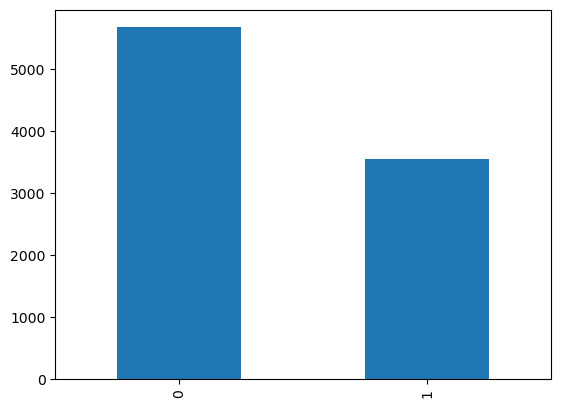

In [48]:
ls['Converted'].value_counts().plot(kind='bar')


In [49]:
# Let's see which was the source the students got to know about the course
ls['Lead Source'].value_counts(normalize=True)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

<Axes: >

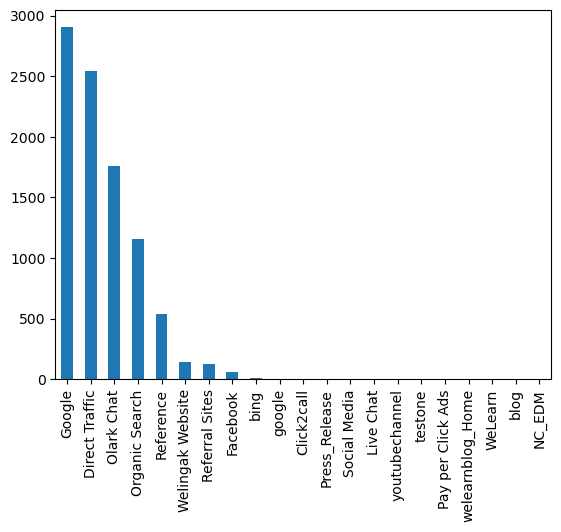

In [50]:
ls['Lead Source'].value_counts().plot(kind='bar')

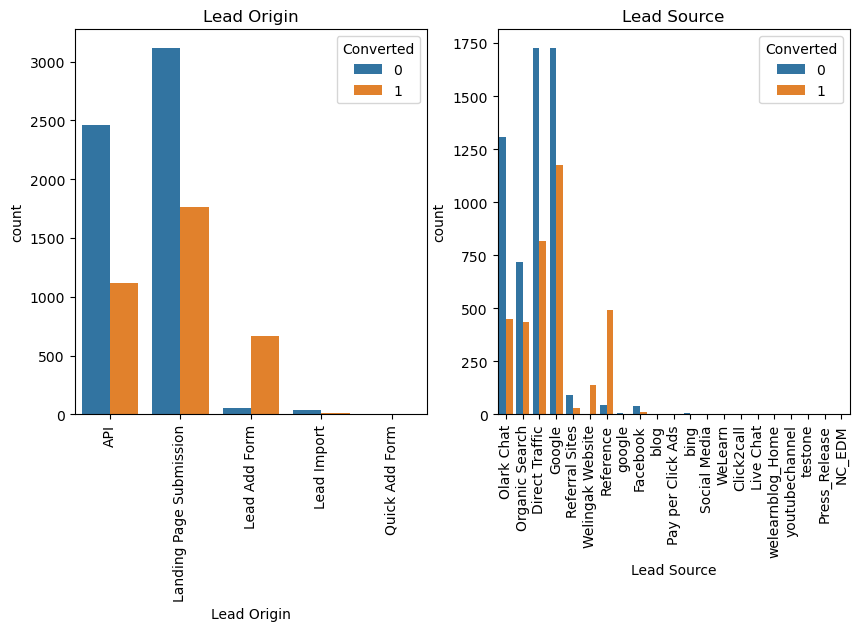

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= ls).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

<Axes: xlabel='Specialization'>

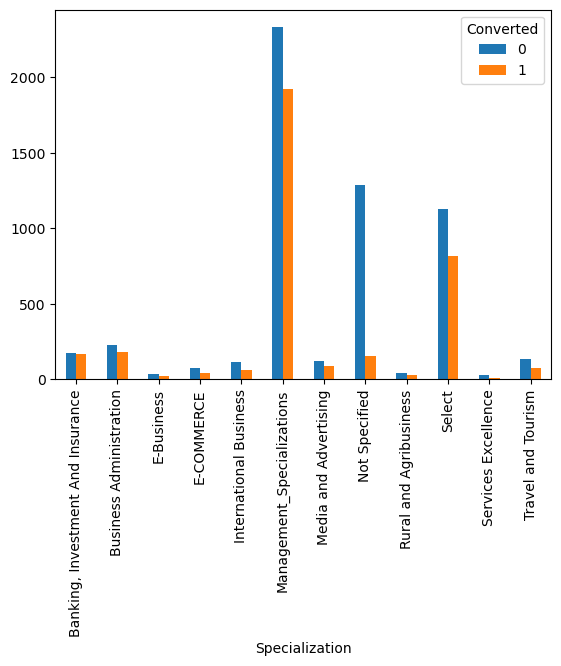

In [52]:
pd.crosstab(ls['Specialization'], ls['Converted']).plot(kind='bar')

<Axes: xlabel='City'>

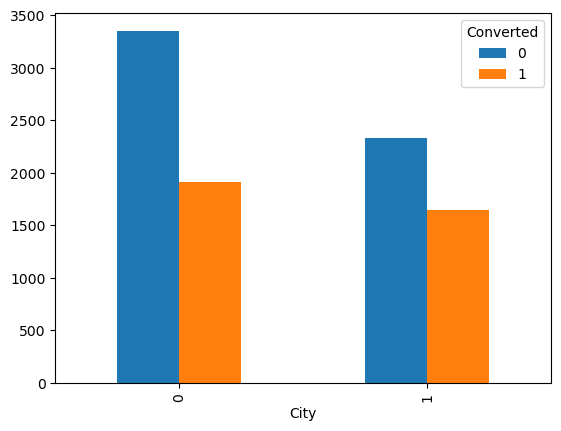

In [53]:
pd.crosstab(ls['City'], ls['Converted']).plot(kind='bar')

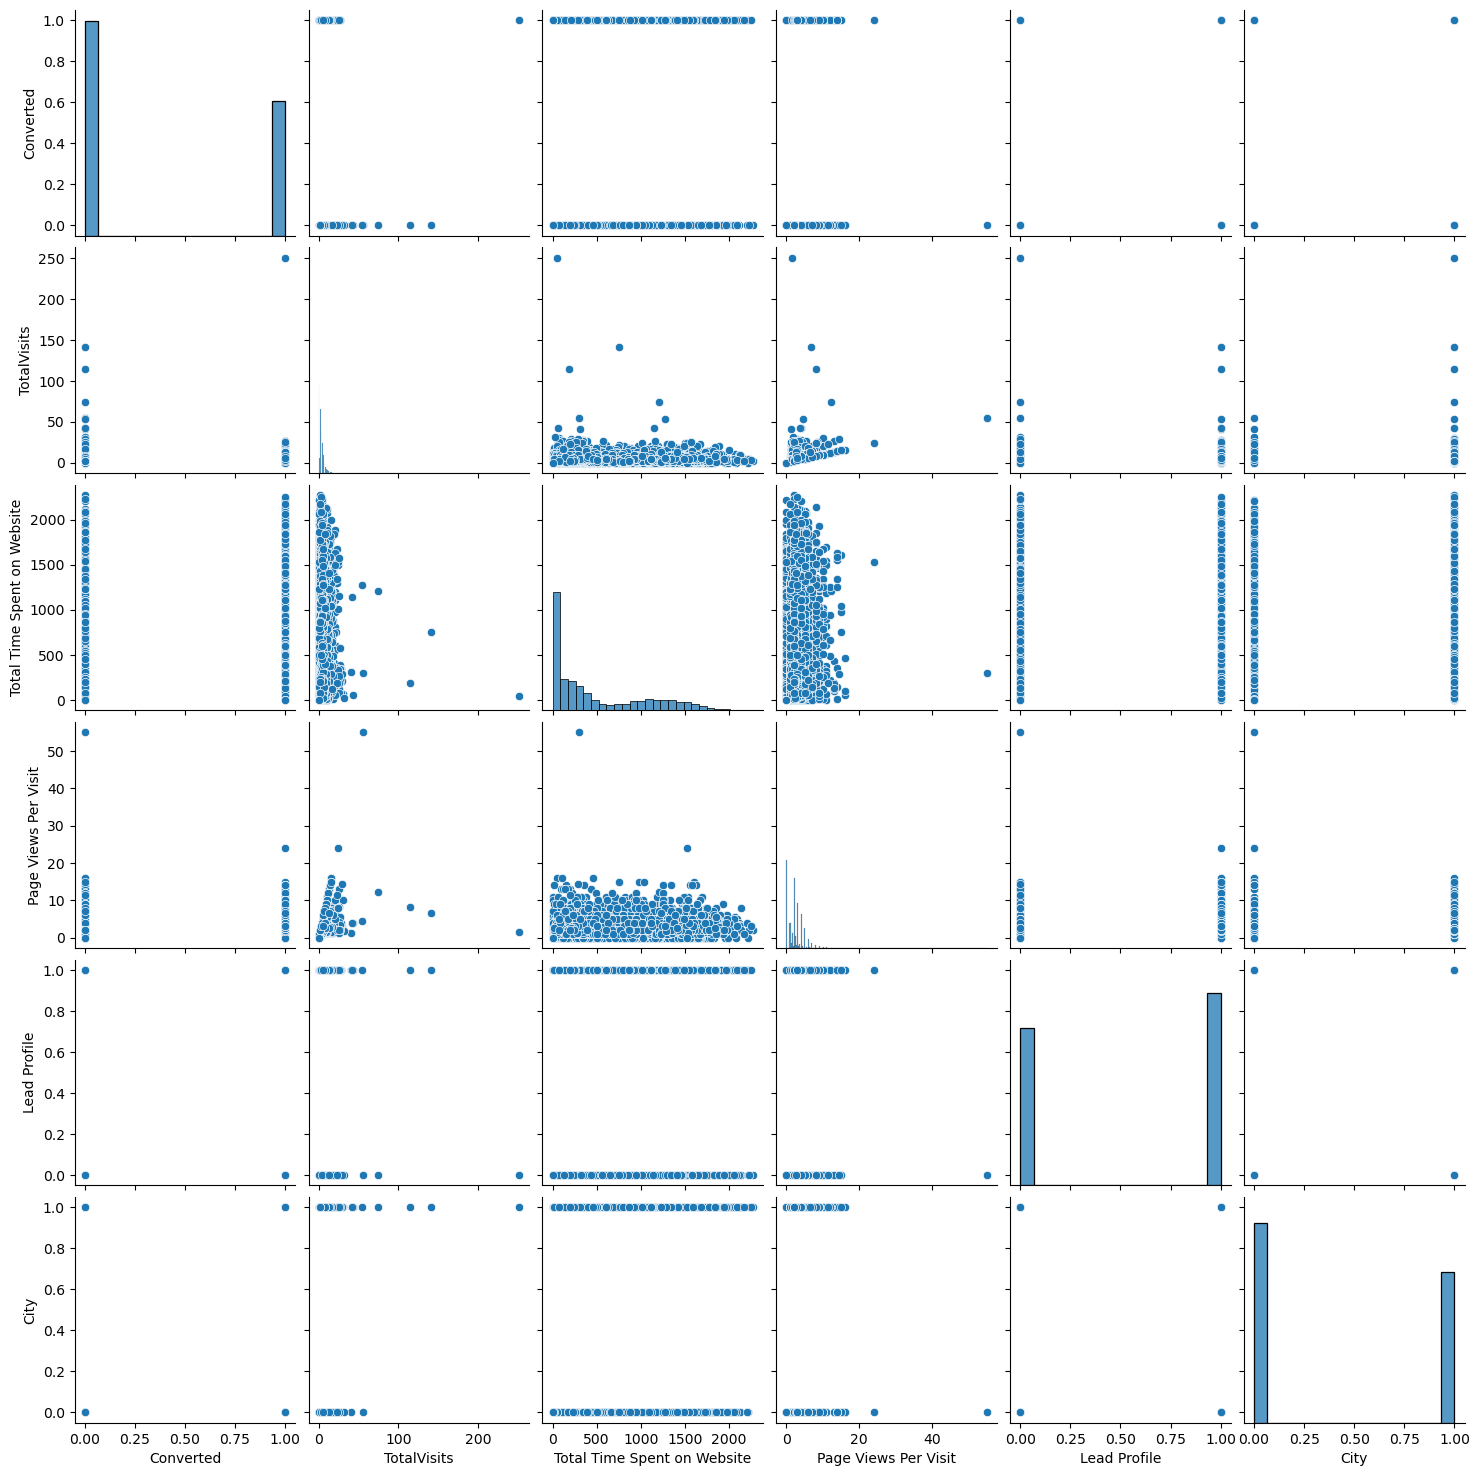

In [54]:
sns.pairplot(ls)

In [55]:
# Lets check correlation of Converted column with other numerical columns. 
ls.corr()['Converted']

Converted                      1.000000
TotalVisits                    0.022502
Total Time Spent on Website    0.362483
Page Views Per Visit          -0.014725
Lead Profile                  -0.042106
City                           0.051860
Name: Converted, dtype: float64

<Axes: >

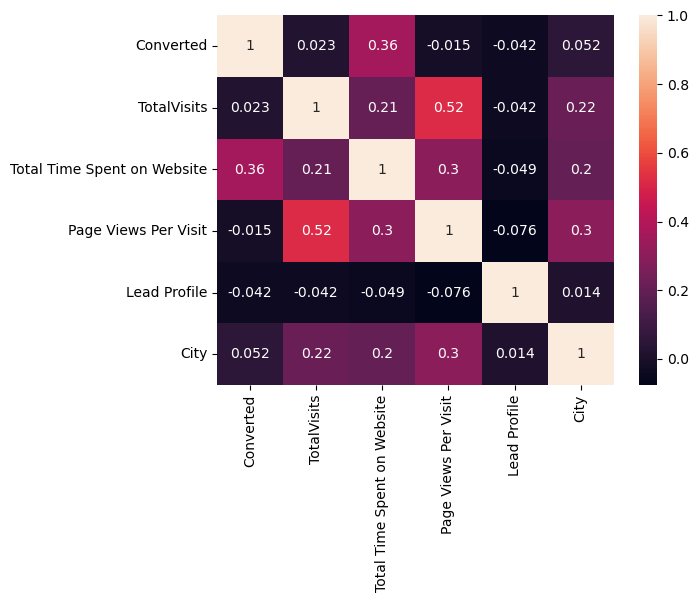

In [56]:
sns.heatmap(ls.corr(),annot=True)

### Observation: 

- Maximum number of positive response was from Google, Digital Traffc, Reference . 
- Majority of the people have not selected the specialization, but the maximum number of leads can be generated from the ones who have selected Management courses.
- Converted column is highly correlated to Total Time Spent on Website

In [57]:
100*ls.isnull().mean()

Prospect ID                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Lead Profile                              0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Dummy variable creation

In [58]:
cat_cols= ls.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [59]:
varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
ls[varlist] = ls[varlist].apply(binary_map)

In [60]:
#creating dummies and dropping the first column and adding the results to the dataframe

dummy = pd.get_dummies(ls[['Lead Origin','What is your current occupation']], drop_first=True)

ls = pd.concat([ls,dummy],1)

In [61]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9240 non-null   object 
 1   Lead Origin                                           9240 non-null   object 
 2   Lead Source                                           9240 non-null   object 
 3   Converted                                             9240 non-null   int64  
 4   TotalVisits                                           9240 non-null   float64
 5   Total Time Spent on Website                           9240 non-null   int64  
 6   Page Views Per Visit                                  9240 non-null   float64
 7   Last Activity                                         9240 non-null   object 
 8   Specialization                                        9240

In [62]:
dummy = pd.get_dummies(ls['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [63]:
ls['Lead Source'].value_counts(dropna=False)

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [64]:
#replacing Nan Values and combining low frequency values
ls['Lead Source'] = ls['Lead Source'].replace(np.nan,'Others')
ls['Lead Source'] = ls['Lead Source'].replace('google','Google')
ls['Lead Source'] = ls['Lead Source'].replace('Facebook','Social Media')
ls['Lead Source'] = ls['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')

In [65]:
dummy = pd.get_dummies(ls['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([ls, dummy], axis = 1)

In [66]:
#replacing Nan Values and combining low frequency values

ls['Last Activity'] = ls['Last Activity'].replace(np.nan,'Others')
ls['Last Activity'] = ls['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [67]:
dummy = pd.get_dummies(ls['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [68]:
ls['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [69]:
#clubbing lower frequency values

ls['Last Notable Activity'] = ls['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')


In [70]:
dummy = pd.get_dummies(ls['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
ls = pd.concat([ls, dummy], axis = 1)

In [71]:
ls.drop(cat_cols,1,inplace = True)

In [72]:
ls.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Train-Test Split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
y = ls['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
X=ls.drop('Converted', axis=1)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=131)

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 2985 to 2124
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6468 non-null   float64
 1   Total Time Spent on Website                           6468 non-null   int64  
 2   Page Views Per Visit                                  6468 non-null   float64
 3   Lead Profile                                          6468 non-null   int64  
 4   City                                                  6468 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6468 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6468 non-null   uint8  
 7   Lead Origin_Lead Import                               6468 non-null   uint8  
 8   Lead Origin_Quick Add Form                            6

### scaling numeric columns

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2985,0.187780,2.523251,-0.135448,-1.121424,1.162388,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2443,-0.870201,-0.885590,-1.050967,-1.121424,-0.860298,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1370,-0.870201,-0.885590,-1.050967,-1.121424,-0.860298,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3125,-0.870201,-0.885590,-1.050967,0.891723,-0.860298,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1911,0.187780,-0.773493,0.780070,0.891723,1.162388,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### Model Building using Stats Model & RFE

In [79]:
import statsmodels.api as sm

Logistic Regression Model Building

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)

# running RFE with 15 variables as output

rfe = RFE(model, n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Profile', False, 19),
 ('City', False, 23),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', False, 25),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 21),
 ('What is your current occupation_Student', False, 8),
 ('What is your current occupation_Unemployed', False, 7),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 2),
 ('Specialization_E-Business', False, 4),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_International Business', True, 1),
 ('Specialization_Management_Specializations', True, 1),
 ('Specialization_Media and Advertising', False, 5),
 

In [83]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [84]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Profile', 'City',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Media and Advertising', 'Specialization_Select',
       'Specialization_Travel and Tourism', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

### Building Logistic regression model

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2717.9
Date:                Tue, 20 Aug 2024   Deviance:                       5435.8
Time:                        16:26:51   Pearson chi2:                 7.33e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8893      0.065    -13.784      0.000      -1.016      -0.763
Total Time Spent on Website                              0.9979      0.036     27.587      0.000       0.927       1.069
Lead Origin_Landing Page Submission                     -1.1045      0.097    -11.357      0.000      -1.295      -0.914
Lead Origin_Lead Add Form                                3.1893      0.189     16.905      0.000       2.820       3.559
What is your current occupation_Housewife               23.0467    1.6e+04      0.001      0.999   -3.12e+04    3.13e+04
What is your current occupation_Working Professional     2.6023      0.182     14.327      0.000       2.246       2.958
Specialization_Banking, Investment And Insurance         1.0404      0.188      5.548      0.000       0.673       1.408
Specialization_E-COMMERCE                                0.6823      0.298      2.288      0.022       0.098       1.267
Specialization_International Business                    0.4809      0.244      1.973      0.049       0.003       0.959
Specialization_Management_Specializations                0.6168      0.093      6.611      0.000       0.434       0.800
Specialization_Rural and Agribusiness                    0.8854      0.375      2.364      0.018       0.151       1.619
Specialization_Services Excellence                       0.5959      0.516      1.154      0.248      -0.416       1.608
Last Activity_Converted to Lead                         -1.3147      0.211     -6.228      0.000      -1.728      -0.901
Last Activity_Email Bounced                             -2.1529      0.339     -6.358      0.000      -2.817      -1.489
Last Activity_Olark Chat Conversation                   -1.2988      0.159     -8.169      0.000      -1.610      -0.987
Last Notable Activity_SMS Sent                           1.5025      0.079     19.055      0.000       1.348       1.657
========================================================================================================================
"""

In [86]:
## p-value of 'What is your current occupation_Housewife' column is high, we can drop it.

col = col.drop('What is your current occupation_Housewife',1)

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2722.7
Date:                Tue, 20 Aug 2024   Deviance:                       5445.3
Time:                        16:26:54   Pearson chi2:                 7.34e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3871
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8862      0.064    -13.753      0.000      -1.012      -0.760
Total Time Spent on Website                              0.9968      0.036     27.590      0.000       0.926       1.068
Lead Origin_Landing Page Submission                     -1.0987      0.097    -11.315      0.000      -1.289      -0.908
Lead Origin_Lead Add Form                                3.1984      0.189     16.965      0.000       2.829       3.568
What is your current occupation_Working Professional     2.5987      0.182     14.312      0.000       2.243       2.955
Specialization_Banking, Investment And Insurance         1.0343      0.187      5.519      0.000       0.667       1.402
Specialization_E-COMMERCE                                0.6760      0.298      2.268      0.023       0.092       1.260
Specialization_International Business                    0.4752      0.244      1.950      0.051      -0.002       0.953
Specialization_Management_Specializations                0.6135      0.093      6.586      0.000       0.431       0.796
Specialization_Rural and Agribusiness                    0.8786      0.374      2.347      0.019       0.145       1.612
Specialization_Services Excellence                       0.5893      0.516      1.142      0.253      -0.422       1.601
Last Activity_Converted to Lead                         -1.3182      0.211     -6.247      0.000      -1.732      -0.905
Last Activity_Email Bounced                             -2.1580      0.339     -6.372      0.000      -2.822      -1.494
Last Activity_Olark Chat Conversation                   -1.3016      0.159     -8.190      0.000      -1.613      -0.990
Last Notable Activity_SMS Sent                           1.4977      0.079     19.007      0.000       1.343       1.652
========================================================================================================================
"""

In [88]:
## p-value of 'Specialization_Rural and Agribusiness' column is high, we can drop it.

col = col.drop('Specialization_Rural and Agribusiness',1)

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.3
Date:                Tue, 20 Aug 2024   Deviance:                       5450.6
Time:                        16:26:56   Pearson chi2:                 7.32e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8751      0.064    -13.640      0.000      -1.001      -0.749
Total Time Spent on Website                              0.9974      0.036     27.606      0.000       0.927       1.068
Lead Origin_Landing Page Submission                     -1.0668      0.096    -11.121      0.000      -1.255      -0.879
Lead Origin_Lead Add Form                                3.2025      0.188     16.991      0.000       2.833       3.572
What is your current occupation_Working Professional     2.5991      0.181     14.336      0.000       2.244       2.954
Specialization_Banking, Investment And Insurance         0.9978      0.187      5.347      0.000       0.632       1.364
Specialization_E-COMMERCE                                0.6381      0.297      2.146      0.032       0.055       1.221
Specialization_International Business                    0.4390      0.243      1.807      0.071      -0.037       0.915
Specialization_Management_Specializations                0.5767      0.092      6.295      0.000       0.397       0.756
Specialization_Services Excellence                       0.5541      0.515      1.075      0.282      -0.456       1.564
Last Activity_Converted to Lead                         -1.3267      0.211     -6.292      0.000      -1.740      -0.913
Last Activity_Email Bounced                             -2.1641      0.339     -6.388      0.000      -2.828      -1.500
Last Activity_Olark Chat Conversation                   -1.3069      0.159     -8.233      0.000      -1.618      -0.996
Last Notable Activity_SMS Sent                           1.4929      0.079     18.967      0.000       1.339       1.647
========================================================================================================================
"""

In [90]:
## p-value of 'Specialization_Services Excellence' column is high, we can drop it.

col = col.drop('Specialization_Services Excellence',1)

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.8
Date:                Tue, 20 Aug 2024   Deviance:                       5451.7
Time:                        16:26:58   Pearson chi2:                 7.32e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3865
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8720      0.064    -13.614      0.000      -0.998      -0.746
Total Time Spent on Website                              0.9967      0.036     27.601      0.000       0.926       1.068
Lead Origin_Landing Page Submission                     -1.0572      0.095    -11.075      0.000      -1.244      -0.870
Lead Origin_Lead Add Form                                3.2052      0.188     17.009      0.000       2.836       3.575
What is your current occupation_Working Professional     2.5988      0.181     14.342      0.000       2.244       2.954
Specialization_Banking, Investment And Insurance         0.9872      0.186      5.299      0.000       0.622       1.352
Specialization_E-COMMERCE                                0.6269      0.297      2.110      0.035       0.045       1.209
Specialization_International Business                    0.4284      0.243      1.765      0.078      -0.047       0.904
Specialization_Management_Specializations                0.5660      0.091      6.219      0.000       0.388       0.744
Last Activity_Converted to Lead                         -1.3288      0.211     -6.304      0.000      -1.742      -0.916
Last Activity_Email Bounced                             -2.1619      0.339     -6.378      0.000      -2.826      -1.498
Last Activity_Olark Chat Conversation                   -1.3064      0.159     -8.234      0.000      -1.617      -0.995
Last Notable Activity_SMS Sent                           1.4917      0.079     18.955      0.000       1.337       1.646
========================================================================================================================
"""

In [92]:
## p-value of 'Specialization_International Business' column is high, we can drop it.

col = col.drop('Specialization_International Business',1)

In [93]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2727.4
Date:                Tue, 20 Aug 2024   Deviance:                       5454.7
Time:                        16:26:59   Pearson chi2:                 7.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3862
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8621      0.064    -13.530      0.000      -0.987      -0.737
Total Time Spent on Website                              0.9969      0.036     27.616      0.000       0.926       1.068
Lead Origin_Landing Page Submission                     -1.0226      0.093    -10.970      0.000      -1.205      -0.840
Lead Origin_Lead Add Form                                3.2129      0.189     17.043      0.000       2.843       3.582
What is your current occupation_Working Professional     2.5984      0.181     14.335      0.000       2.243       2.954
Specialization_Banking, Investment And Insurance         0.9470      0.185      5.126      0.000       0.585       1.309
Specialization_E-COMMERCE                                0.5851      0.296      1.976      0.048       0.005       1.165
Specialization_Management_Specializations                0.5259      0.088      5.981      0.000       0.354       0.698
Last Activity_Converted to Lead                         -1.3324      0.211     -6.323      0.000      -1.745      -0.919
Last Activity_Email Bounced                             -2.1503      0.338     -6.367      0.000      -2.812      -1.488
Last Activity_Olark Chat Conversation                   -1.3093      0.158     -8.262      0.000      -1.620      -0.999
Last Notable Activity_SMS Sent                           1.4940      0.079     18.980      0.000       1.340       1.648
========================================================================================================================
"""

In [94]:
## p-value of 'Specialization_E-COMMERCE' column is high, we can drop it.

col = col.drop('Specialization_E-COMMERCE',1)

In [95]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2729.2
Date:                Tue, 20 Aug 2024   Deviance:                       5458.5
Time:                        16:27:01   Pearson chi2:                 7.27e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3858
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8546      0.064    -13.455      0.000      -0.979      -0.730
Total Time Spent on Website                              0.9951      0.036     27.596      0.000       0.924       1.066
Lead Origin_Landing Page Submission                     -0.9908      0.092    -10.818      0.000      -1.170      -0.811
Lead Origin_Lead Add Form                                3.2195      0.188     17.083      0.000       2.850       3.589
What is your current occupation_Working Professional     2.6038      0.181     14.365      0.000       2.249       2.959
Specialization_Banking, Investment And Insurance         0.9128      0.184      4.966      0.000       0.553       1.273
Specialization_Management_Specializations                0.4918      0.086      5.717      0.000       0.323       0.660
Last Activity_Converted to Lead                         -1.3327      0.211     -6.325      0.000      -1.746      -0.920
Last Activity_Email Bounced                             -2.1580      0.338     -6.389      0.000      -2.820      -1.496
Last Activity_Olark Chat Conversation                   -1.3109      0.158     -8.280      0.000      -1.621      -1.001
Last Notable Activity_SMS Sent                           1.4942      0.079     18.983      0.000       1.340       1.648
========================================================================================================================
"""

#### p-value is acceptable for all columns, we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.93
5,Specialization_Management_Specializations,2.82
9,Last Notable Activity_SMS Sent,1.29
2,Lead Origin_Lead Add Form,1.25
3,What is your current occupation_Working Profes...,1.20
4,"Specialization_Banking, Investment And Insurance",1.13
0,Total Time Spent on Website,1.12
7,Last Activity_Email Bounced,1.05
6,Last Activity_Converted to Lead,1.04
8,Last Activity_Olark Chat Conversation,1.04


#### Values seem to be in order.
### Next step - Derive the Probabilities, Lead Score, Predictions on Train Data

In [98]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2985    0.760827
2443    0.951559
1370    0.149837
3125    0.045358
1911    0.106848
2363    0.046980
1554    0.038179
450     0.096340
2913    0.878184
5631    0.548832
dtype: float64

In [99]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.76082694, 0.95155915, 0.14983692, 0.04535805, 0.10684769,
       0.04698035, 0.03817938, 0.0963398 , 0.87818417, 0.54883156])

In [100]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.760827,2985
1,1,0.951559,2443
2,1,0.149837,1370
3,0,0.045358,3125
4,0,0.106848,1911


In [101]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.760827,2985,1
1,1,0.951559,2443,1
2,1,0.149837,1370,0
3,0,0.045358,3125,0
4,0,0.106848,1911,0


In [102]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3538  450]
 [ 817 1663]]


In [103]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8041125541125541


In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [105]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.6705645161290322

In [106]:
TN / float(TN+FP)

0.8871614844533601

In [107]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.11283851554663991


In [108]:
# positive predictive value 
print (TP / float(TP+FP))

0.7870326549929011


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8123995407577497


### PLOTTING ROC CURVE

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

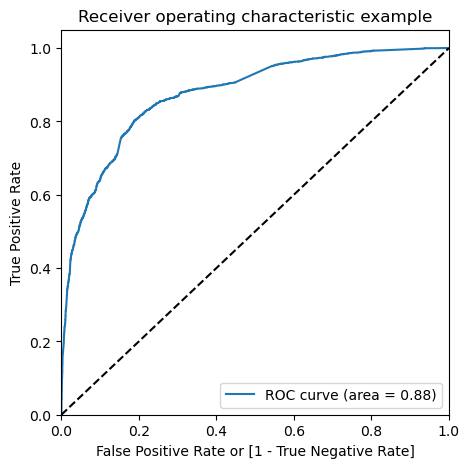

In [112]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.88 indicating a good predictive model.

### Finding Optimal Cutoff Point

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.760827,2985,1,1,1,1,1,1,1,1,1,0,0
1,1,0.951559,2443,1,1,1,1,1,1,1,1,1,1,1
2,1,0.149837,1370,0,1,1,0,0,0,0,0,0,0,0
3,0,0.045358,3125,0,1,0,0,0,0,0,0,0,0,0
4,0,0.106848,1911,0,1,1,0,0,0,0,0,0,0,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383426  1.000000  0.000000
0.1   0.1  0.562307  0.977419  0.304162
0.2   0.2  0.749072  0.885484  0.664243
0.3   0.3  0.793135  0.842742  0.762287
0.4   0.4  0.806741  0.777016  0.825226
0.5   0.5  0.804113  0.670565  0.887161
0.6   0.6  0.797928  0.593952  0.924774
0.7   0.7  0.784014  0.510887  0.953862
0.8   0.8  0.765461  0.427823  0.975426
0.9   0.9  0.709338  0.258468  0.989719


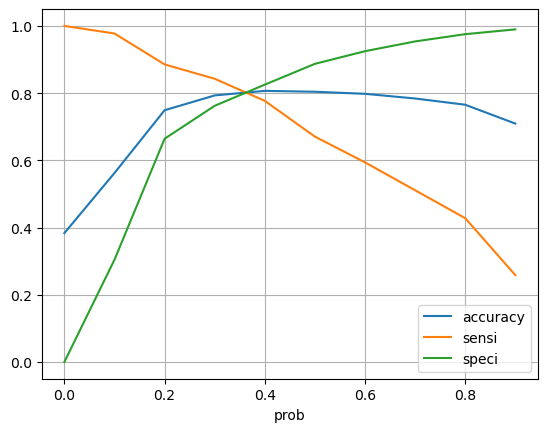

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid(True)
plt.show()

In [116]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.760827,2985,1,1,1,1,1,1,1,1,1,0,0,1
1,1,0.951559,2443,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.149837,1370,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.045358,3125,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.106848,1911,0,1,1,0,0,0,0,0,0,0,0,0


In [117]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.760827,2985,1,76
1,1,0.951559,2443,1,95
2,1,0.149837,1370,0,15
3,0,0.045358,3125,0,5
4,0,0.106848,1911,0,11


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7931354359925789

In [119]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3040,  948],
       [ 390, 2090]])

In [120]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [121]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.842741935483871

In [122]:
# Let us calculate specificity
TN / float(TN+FP)

0.7622868605817452

#### Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 79.31%

Sensitivity : 84.27%

Specificity : 76.22%

In [123]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.23771313941825475


In [124]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6879526003949967


In [125]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3040,  948],
       [ 390, 2090]])

In [126]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6879526003949967

In [127]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.842741935483871

In [128]:
from sklearn.metrics import precision_score, recall_score

In [129]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6879526003949967

In [130]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.842741935483871

In [131]:
from sklearn.metrics import precision_recall_curve

In [132]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

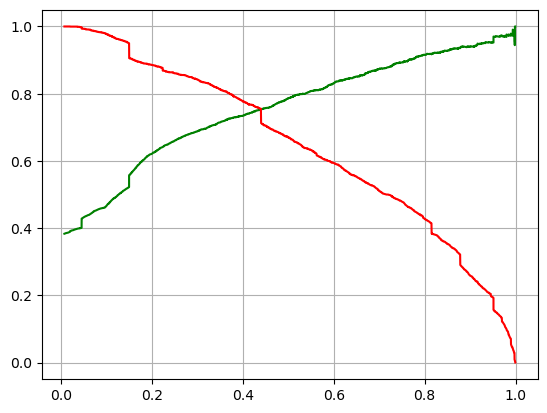

In [133]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.grid(True)
plt.show()

In [134]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Profile,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,What is your current occupation_Housewife,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5726,-0.545026,-0.900511,-1.136400,0.926906,-0.888562,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4848,0.054384,-0.277045,0.755862,0.926906,-0.888562,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3029,-0.545026,-0.900511,-1.136400,-1.078858,-0.888562,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6290,1.103350,2.144949,1.465461,-1.078858,1.125414,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1075,0.054384,0.493753,0.755862,0.926906,1.125414,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [135]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Management_Specializations,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
5726,-0.900511,0,0,0,0,0,0,0,0,0
4848,-0.277045,1,0,0,0,0,0,0,0,0
3029,-0.900511,0,0,0,0,0,0,0,1,0
6290,2.144949,1,0,1,0,1,0,0,0,1
1075,0.493753,1,0,0,0,1,0,0,0,0


In [136]:
X_test_sm = sm.add_constant(X_test)


### PREDICTIONS ON TEST SET


In [137]:
y_test_pred = res.predict(X_test_sm)


In [138]:
y_test_pred[:10]


5726    0.147955
4848    0.107064
3029    0.044719
6290    0.992451
1075    0.296854
7873    0.044719
6946    0.537784
998     0.095526
5849    0.099939
5964    0.973040
dtype: float64

In [139]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [140]:
# Let's see the head
y_pred_1.head()

,0
5726,0.147955
4848,0.107064
3029,0.044719
6290,0.992451
1075,0.296854


In [141]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [142]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [143]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [144]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [145]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5726,0.147955
1,0,4848,0.107064
2,0,3029,0.044719
3,1,6290,0.992451
4,1,1075,0.296854


In [146]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [147]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5726,0.147955
1,0,4848,0.107064
2,0,3029,0.044719
3,1,6290,0.992451
4,1,1075,0.296854


In [148]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [149]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5726,0,0.147955,15
1,4848,0,0.107064,11
2,3029,0,0.044719,4
3,6290,1,0.992451,99
4,1075,1,0.296854,30


In [150]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [151]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5726,0,0.147955,15,0
1,4848,0,0.107064,11,0
2,3029,0,0.044719,4,0
3,6290,1,0.992451,99,1
4,1075,1,0.296854,30,0


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7907647907647908

In [153]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1301,  390],
       [ 190,  891]])

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8242368177613321

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.7693672383205205

In [157]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6955503512880562

In [158]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8242368177613321



Final Observation: Let us compare the values obtained for Train & Test:

Train Data:

    Accuracy : 79.31%

    Sensitivity : 84.27%

    Specificity : 76.22%


Test Data:

    Accuracy : 79.07%

    Sensitivity : 82.42%

    Specificity : 76.94%

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model